## Description:

    Ordination and Hypothesis testing



# Setting variables

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)
library(vegan)
library(RColorBrewer)


/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Stackoverflow is a great place to get help:
http://stackoverflow.com/tags/ggplot2.

  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: iterators

  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/bryan/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’




# Loading phyloseq object - rarified data

In [3]:
%%R
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')
physeq.Full = readRDS(F)
sd = sample_data(physeq.Full)
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [4]:
%%R
sample_data(physeq.Full)$Rep = factor(sample_data(physeq.Full)$Rep)
sample_data(physeq.Full)$DAP = factor(sample_data(physeq.Full)$DAP)
colnames(sample_data(physeq.Full))

 [1] "X.sample"            "Library"             "Primer_Plate"       
 [4] "Primer_Well_ID"      "primerFR_ID_byPlate" "primerFR_ID_total"  
 [7] "barcode_ID"          "PlotID"              "Plant"              
[10] "Plot"                "Treatment"           "Rep"                
[13] "DAP"                 "Sampling"            "PlantSample"        
[16] "Type"                "Grass_Broad"         "Status"             
[19] "Subfamily"           "fwd_barcode"         "rev_barcode"        
[22] "Planted"             "Biomass_P"           "SLA"                
[25] "Leaf_N"              "Leaf_C"              "LeafC_N"            
[28] "LNa"                 "Plant_N"             "Plant_C"            
[31] "Plant_CN"            "d15N"                "tN_p"               
[34] "BX_activity_g"       "CB_activity_g"       "LAP_activity_g"     
[37] "NAG_activity_g"      "BX_rel"              "CB_rel"             
[40] "LAP_rel"             "NAG_rel"             "NO3_ug_g"           
[43] "

## Calculate pairwise weighted Unifrac distances between samples

In [5]:
%%R
registerDoParallel(cores=28)
wunif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

unif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [6]:
%%R
# PCoA 

ordu = ordinate(physeq.Full, "PCoA", "unifrac", weighted=TRUE)


In [7]:
%%R
sample_data(physeq.Full)$Plant = factor(sample_data(physeq.Full)$Plant, levels = c("BARE", "75-062", "B73", "B97" ,  "H99" , "Hp301",
                                                                      "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
                                                                      "ECHCG", "SETFA", "SORBI", "SORSUD", 
                                                                      "ELCOR", "ERATE",
                                                                      "ABUTH", "HELAN", "FAGES", "AMAPO", "GLYMA"))

p = plot_ordination(physeq.Full, ordu, justDF = TRUE)

In [8]:
%%R
p %>% head

                      Axis.1      Axis.2          X.sample Library Primer_Plate
sample2-1.06_Npos -0.1533022 -0.03219172 sample2-1.06_Npos       1            1
sample6-4.27_Npos -0.1298658 -0.05804125 sample6-4.27_Npos       1            2
sample4-4.27_Nneg -0.1490966 -0.02604058 sample4-4.27_Nneg       1            1
sample4-1.06_Nneg -0.1293516 -0.04557593 sample4-1.06_Nneg       1            1
sample2-1.06_Nneg -0.1430756 -0.02717373 sample2-1.06_Nneg       1            1
sample6-3.07_Nneg -0.1514181 -0.06413171 sample6-3.07_Nneg       1            2
                  Primer_Well_ID primerFR_ID_byPlate primerFR_ID_total
sample2-1.06_Npos             H9                  72                72
sample6-4.27_Npos            F11                  86               182
sample4-4.27_Nneg            B12                  90                90
sample4-1.06_Nneg            E11                  85                85
sample2-1.06_Nneg             G9                  71                71
sample6-3.07_N

# Ordination for paper

In [9]:
#%%R
#library("cowplot")

In [10]:
%%R
theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }


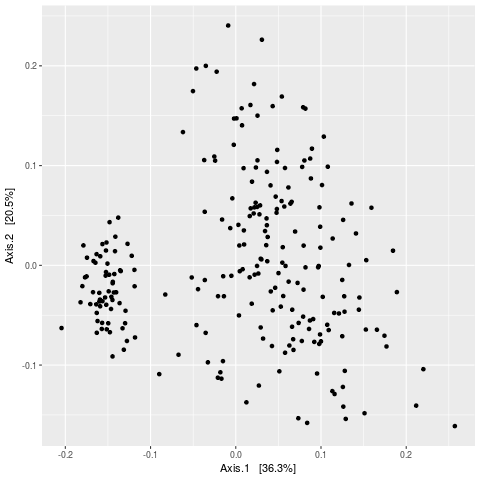

In [11]:
%%R
plot_ordination(physeq.Full, ordu)

In [12]:
%%R
p = plot_ordination(physeq.Full, ordu, justDF = TRUE)

## Create panels

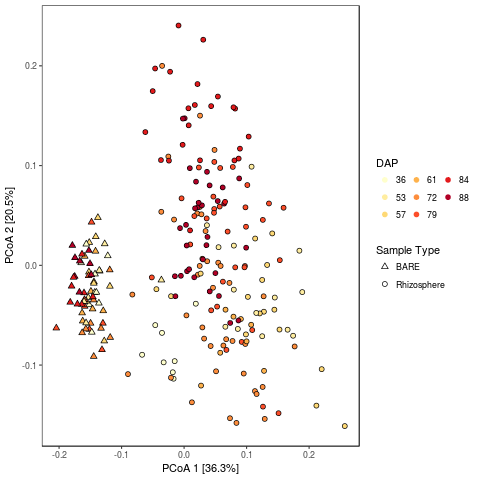

In [13]:
%%R

p$DAP = as.factor(p$DAP)

# generate 8 colors from the YlOrRd palette
cs = brewer.pal(8,"YlOrRd")

p2 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = DAP, shape = Planted),  size = 2) +
theme_pub() +

scale_shape_manual(values=c(24, 21), guide = guide_legend(title = "Sample Type", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",
p2

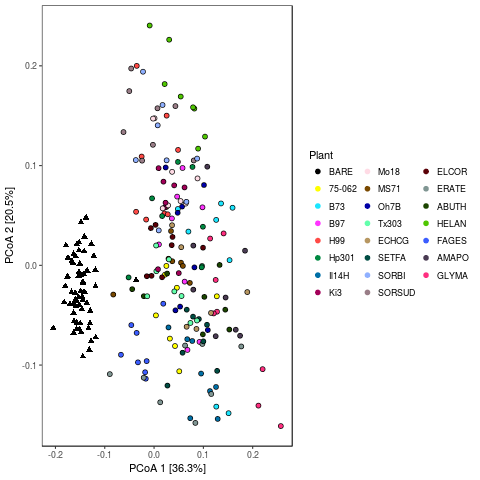

In [14]:
%%R
p3 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(x = Axis.1, y = Axis.2, shape = Planted, fill = Plant), size = 2) +
#geom_point(data = p, aes(shape = Planted, size = 3)) +
scale_shape_manual(values=c(17, 21), guide = FALSE) +
theme_pub() +
scale_fill_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80"), 
                   guide = guide_legend(title = "Genotype", ncol = 3)) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
#theme(axis.title.x = element_blank()) +
guides(fill=guide_legend(override.aes=list(colour= c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")), ncol = 3)) + 
theme(legend.position="right") 

# ggtitle("Plant Genotype")
p3

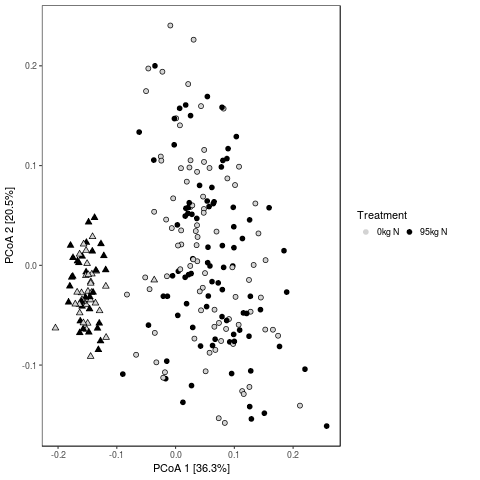

In [15]:
%%R
p4 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(shape = Planted, fill = Treatment), size = 2) + #shape = Planted
scale_shape_manual(values=c(24, 21), guide = FALSE) +
scale_fill_manual(values = c("lightgrey", "black"), labels=c("0kg N", "95kg N"), 
                  guide = guide_legend(title = "Nitrogen\nTreatment", pch = 16, color = c("#E57E68", "#000000"))) +
theme_pub() +



  
# scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#          "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#          "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80"), 
#                    guide = guide_legend(title = "Genotype")) + 

labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +

# # theme(panel.grid = element_blank()) +
# # theme(panel.border = element_blank()) +
# # theme(axis.line.x = element_line(color="black", size = 1),
# #     axis.line.y = element_line(color="black", size = 1),
# theme(axis.title.y = element_blank())+ 
guides(fill=guide_legend(override.aes=list(colour= c("lightgrey", "black")), ncol = 3)) +
 theme(legend.position="right")


# guides(fill=guide_legend(override.aes=list(colour= c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#          "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#          "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")), ncol = 3))


p4

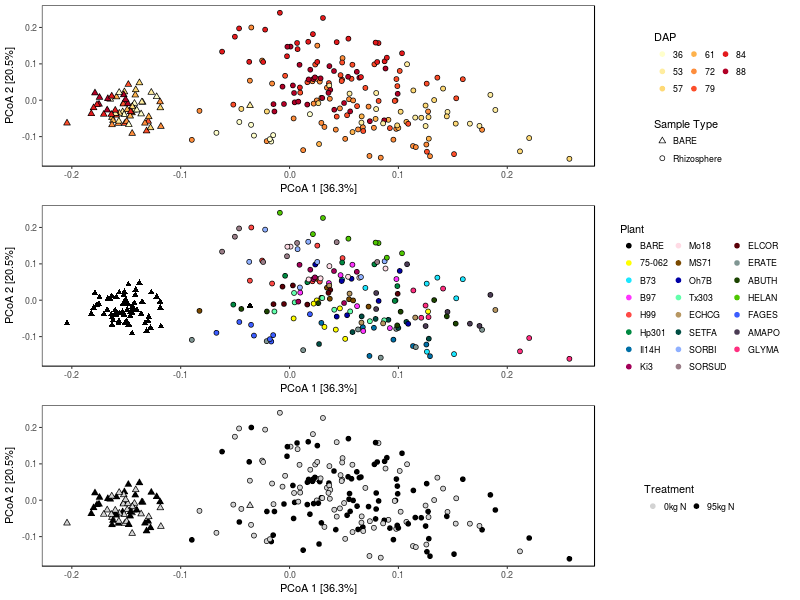

In [16]:
%%R -w 800 -h 600
g_legend<-function(a.gplot){
    tmp <- ggplot_gtable(ggplot_build(a.gplot))
    leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
    legend <- tmp$grobs[[leg]]
    legend
}

#legend1 <- g_legend(p1)
legend2 <- g_legend(p2)
legend3 <- g_legend(p3)
legend4 <- g_legend(p4)                       
#p1.f =  p1 + theme(legend.position = 'none')
p2.f =  p2 + theme(legend.position = 'none')
p3.f =  p3 + theme(legend.position = 'none')                        
p4.f =  p4 + theme(legend.position = 'none')
                        

grid.arrange(p2.f, legend2, p3.f, legend3, p4.f, legend4, ncol = 2, widths=c(3,1))


In [17]:
# Save plot

In [18]:
%%R
#First save plot at 2/3 width to leave room for legends
svg("/home/bryan/RhizCG/figures/ms_figures/PCoA_msVersion.svg", width = 7.09, height = 6)
grid.arrange(p2.f, legend2, p3.f, legend3, p4.f, legend4,  ncol = 2, widths = c(3,1.5))
dev.off()

# Aligning legends and adding labels in inkscape required


png 
  2 


# Adonis 

## Whole dataset

In [32]:
%%R
set.seed(101)

df = as(sample_data(physeq.Full), "data.frame")
d = wunif.dist
#Fulladonis = adonis(formula = d ~ Planted + DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis = adonis(formula = d ~ Planted + DAP + Plant + Treatment, df, strata = df$Rep, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ Planted + DAP + Plant + Treatment, data = df,      permutations = 999, strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Planted     1    2.2437 2.24374 141.493 0.25414  0.001 ***
DAP         7    1.4651 0.20930  13.199 0.16595  0.001 ***
Plant      21    1.7952 0.08549   5.391 0.20334  0.001 ***
Treatment   1    0.0421 0.04206   2.652 0.00476  0.031 *  
Residuals 207    3.2825 0.01586         0.37180           
Total     237    8.8287                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Rhizosphere 

In [33]:
%%R

physeq.plant = subset_samples(physeq.Full, Plant != "BARE")

#remove taxa that aren't in any plant samples
physeq.plant = filter_taxa(physeq.plant, function(x) max(x) > 0, TRUE)
physeq.plant

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4971 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4971 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4971 tips and 4970 internal nodes ]


In [34]:
%%R
sample_data(physeq.plant)$Plant %>% unique()

 [1] 75-062 Oh7B   SETFA  MS71   ERATE  FAGES  B73    AMAPO  B97    GLYMA 
[11] H99    Il14H  SORBI  SORSUD ELCOR  ABUTH  Ki3    HELAN  Tx303  Hp301 
[21] ECHCG  Mo18  
22 Levels: 75-062 B73 B97 H99 Hp301 Il14H Ki3 Mo18 MS71 Oh7B Tx303 ... GLYMA


In [35]:
%%R
registerDoParallel(cores=28)
plant.wunif.dist = distance(physeq.plant, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [36]:
%%R
df = as(sample_data(physeq.plant), "data.frame")
d = plant.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Plant + Treatment, df, strata = df$Rep,  permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ DAP + Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
DAP         7    1.9678 0.281116 14.8741 0.32612  0.001 ***
Plant      14    1.1572 0.082657  4.3735 0.19178  0.001 ***
Treatment   1    0.0552 0.055211  2.9212 0.00915  0.005 ** 
Residuals 151    2.8539 0.018900         0.47296           
Total     173    6.0341                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Bare soil samples

In [24]:
%%R
phy = subset_samples(physeq.Full, Plant == "BARE")

#calculate distance matrix for subset
registerDoParallel(cores=28)
bare.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)



In [37]:
%%R
#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = bare.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Treatment, df,strata = df$Rep,  permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ DAP + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
DAP        7   0.13534 0.0193341  2.6147 0.24569  0.001 ***
Treatment  1   0.00883 0.0088320  1.1944 0.01603  0.194    
Residuals 55   0.40669 0.0073944         0.73828           
Total     63   0.55086                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Maize ADONIS

In [28]:
%%R
phy.maize = subset_samples(physeq.Full, Type == "Maize")

#calculate distance matrix for subset
registerDoParallel(cores=28)
maize.wunif.dist = distance(phy.maize, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)



In [40]:
%%R
#perform ADONIS
df = as(sample_data(phy.maize), "data.frame")
d = maize.wunif.dist
Maizeadonis = adonis(formula = d ~ DAP + Plant + Treatment, df, strata = df$rep,  permutations = 999)
Maizeadonis


Call:
adonis(formula = d ~ DAP + Plant + Treatment, data = df, permutations = 999,      strata = df$rep) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
DAP        2   0.22307 0.111533  6.4364 0.10532  0.001 ***
Plant      8   0.54785 0.068481  3.9520 0.25866  0.001 ***
Treatment  1   0.03017 0.030173  1.7412 0.01425  0.084 .  
Residuals 76   1.31695 0.017328         0.62178           
Total     87   2.11804                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Calculate genotype effect on each date

#### DAP = 36 only one plant

#### DAP = 53

In [38]:
%%R

plant53 = subset_samples(physeq.Full, DAP == 53 & Plant != "BARE")

sample_data(plant53)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plant53.wunif.dist = distance(plant53, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plant53), "data.frame")
d = plant53.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "ECHCG" "AMAPO"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
Plant      1   0.04534 0.045341  1.9176 0.13721  0.089 .
Treatment  1   0.02502 0.025022  1.0583 0.07572  0.370  
Residuals 11   0.26009 0.023645         0.78707         
Total     13   0.33046                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### DAP = 57

In [60]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 57 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "ABUTH" "GLYMA"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Plant      1   0.12351 0.123507  3.4597 0.19888  0.002 **
Treatment  1   0.03343 0.033426  0.9363 0.05383  0.428   
Residuals 13   0.46408 0.035698         0.74729          
Total     15   0.62101                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### DAP =  61; only one plant

#### DAP =  72

In [61]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 72 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "75-062" "H99"    "Il14H"  "MS71"   "ERATE" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      4   0.44262 0.110655  6.5764 0.42963  0.001 ***
Treatment  1   0.01553 0.015534  0.9232 0.01508  0.378    
Residuals 34   0.57208 0.016826         0.55529           
Total     39   1.03023                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 79

In [62]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 79 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "B73"   "B97"   "Hp301" "Oh7B" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Plant      3   0.10729 0.035762  1.7738 0.15490  0.008 **
Treatment  1   0.04099 0.040992  2.0332 0.05918  0.020 * 
Residuals 27   0.54434 0.020161         0.78592          
Total     31   0.69262                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 84

In [63]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 84 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "SORBI"  "SORSUD" "HELAN" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      2   0.14327 0.071637  4.3686 0.28414  0.001 ***
Treatment  1   0.03299 0.032989  2.0117 0.06542  0.067 .  
Residuals 20   0.32797 0.016398         0.65043           
Total     23   0.50423                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 88

In [64]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 88 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print
sample_data(plantDay)$Library %>% unique() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "Ki3"   "Mo18"  "Tx303" "ELCOR"
[1] 2

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      3   0.29518 0.098393  6.5325 0.40691  0.001 ***
Treatment  1   0.02357 0.023566  1.5646 0.03249  0.142    
Residuals 27   0.40667 0.015062         0.56061           
Total     31   0.72542                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Weighted UniFrac Faceted by Day

In [ ]:
%%R -w 800 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 5, pch = 21) +
        facet_wrap(~ DAP, ncol = 4) +
        scale_size(range=c(2,8))+
        theme_bw() +
        ggtitle("NMDS of w-UniFrac Distances") +
        theme(plot.title = element_text(face="bold", size=20))

p1

# Session info:

In [39]:
%%R
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.2 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2 vegan_2.4-3        lattice_0.20-35    permute_0.9-4     
 [5] tidyr_0.6.0        dplyr_0.5.0        gridExtra_2.2.1    doParallel_1.0.10 
 [9] iterators_1.0.8    foreach_1.4.3      ggplot2_2.2.1      phyloseq_1.19.1   

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.12        compiler_3.3.2      plyr_1.8.4         
 [4] XVector_0.14.1      zlibbioc_